# Analyzing COVID-19 Data in Yemen
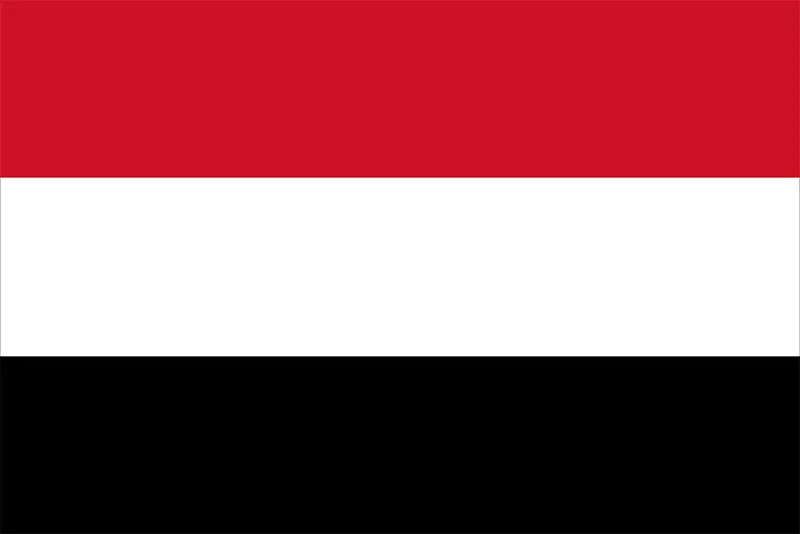

## Data Source

The data is downloaded from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide). Upload the data to an S3 bucket, and import the necessary python libraries.

In [2]:
%matplotlib inline
import pandas

## Background

After the war in Yemen took off, the country went through a series of political issues and major cycles of violence.  When COVID-19 struck, it added more layers of problems for Yemen. There was a pre-existing humanitarian crisis so the country was already unprepared to deal with a pandemic.  It is likely impossible to know the exact numbers of COVID-19 cases and deaths due to the country having almost no government.  The Houthi forces in the North are also accused of hiding the true impact of COVID-19 on their forces.  The data gathered is the closest estimate to the true cases in Yemen.

## Import Data from S3 Bucket

In [3]:
df= pandas.read_excel('s3://koyne-ia241/covid_data.xls')
df[:10] #top 10 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-09-12 00:00:00,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-08-12 00:00:00,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-07-12 00:00:00,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-06-12 00:00:00,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-05-12 00:00:00,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## List of Countries

In [5]:
pandas.unique(df['countriesAndTerritories'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

## Yemen Data

In [6]:
Yemen_data= df.loc[df['countriesAndTerritories']=='Yemen']
Yemen_data[:10]  #Defining data for Yemen for simplification purposes

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
61111,14/12/2020,14,12,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,0.020575
61112,13/12/2020,13,12,2020,1,0,Yemen,YE,YEM,29161922.0,Asia,0.030862
61113,2020-12-12 00:00:00,12,12,2020,1,0,Yemen,YE,YEM,29161922.0,Asia,0.027433
61114,2020-11-12 00:00:00,11,12,2020,2,0,Yemen,YE,YEM,29161922.0,Asia,0.024004
61115,2020-10-12 00:00:00,10,12,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,0.020575
61116,2020-09-12 00:00:00,9,12,2020,1,0,Yemen,YE,YEM,29161922.0,Asia,0.024004
61117,2020-08-12 00:00:00,8,12,2020,1,0,Yemen,YE,YEM,29161922.0,Asia,0.020575
61118,2020-07-12 00:00:00,7,12,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,0.027433
61119,2020-06-12 00:00:00,6,12,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,0.027433
61120,2020-05-12 00:00:00,5,12,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,0.030862


## What are the trends of COVID-19 Data in Yemen Over Time?

<AxesSubplot:xlabel='dateRep'>

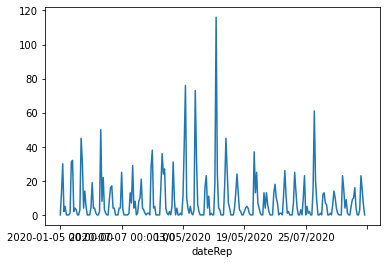

In [7]:
covid_cases_over_time = Yemen_data.groupby('dateRep').sum()['cases']
covid_cases_over_time.plot()  #Plotting number of cases over time using a line graph

This line graph shows the peaks and increase of COVID-19 cases starting in May of 2020 until June and then a smaller peak again in July.

## In What Months are COVID-19 Cases the Highest in Yemen?

<AxesSubplot:xlabel='month'>

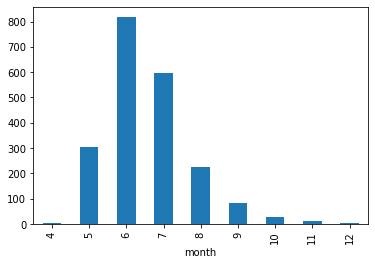

In [8]:
sum_cases_by_month= Yemen_data.groupby('month').sum()['cases']
sum_cases_by_month.plot.bar()  #Displaying months with highest number of cases in a bar graph

This bar graph shows that COVID-19 cases start increasing in the 5th month with a peak in the 6th, and then a slow decline until almost no cases in the 12th month.

## What are the Number of Deaths in Relation to the Number of Cases in Yemen? 

<AxesSubplot:xlabel='cases', ylabel='deaths'>

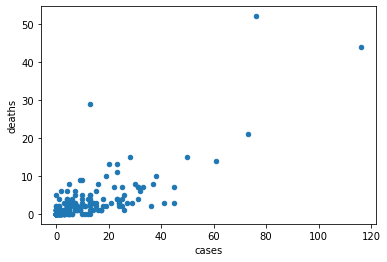

In [11]:
Yemen_data.plot.scatter(x='cases', y='deaths')  #Comparing number of deaths and cases using a scatter plot

This scatter plot shows a few outliers of high cases and high deaths but for the most part remains relatively low in case and death rates.

## Conclusion

To conclude, Yemen had its peak of COVID-19 cases in the 6th month of the 2020 (June) and saw a steady decline in the following months.  When there were relatively low cases of COVID-19, the death rates were also low, though there were a few case spikes which resulted in more deaths in peak months.  Since the peak in 2020, Yemen has faced a gradual decline of cases and has seen very few new cases.

This is reliable data with credible sourcing.  There are a few limitations to note, including: a single source of COVID-19 Data, this source doesn't mention any age or underlying conditions in the rates of infection, or location of the major spikes.  Additionally, there is a personal limitation with me as I am still a beginner user of Python.  Because of my ability, I created simple graphs that are easy to read and hopefully more visually appealing to my audience.  I am more likely to make errors since I am human and am still learning Python.